In [2]:
# list 6-1-1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ生成
np.random.seed(seed=0) # 乱数を固定
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 入力データ
T = np.zeros(X_n, dtype = np.uint8) # 目標データ
Dist_s = [0.4, 0.8] # 分布の開始地点
Dist_w = [0.8, 1.6] # 分布の幅
Pi = 0.5 # クラス0の比率

for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]
    
# データ表示
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


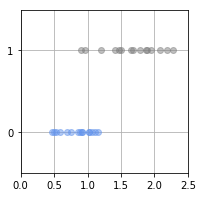

In [3]:
# list 6-1-2
# データ分布表示
def show_data1(x, t):
    K = np.max(t) + 1
    
    for k in range(K):
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5, linestyle='none', marker='o')
        
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0, 1])
    
# main
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()